In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Libraries / 필요한 라이브러리 불러오기

In [2]:
# import torch

# imports the PyTorch library, which is a popular open-source machine learning library for Python, primarily used for applications such as natural language processing and computer vision.

# 파이썬용으로 널리 사용되는 오픈소스 머신러닝 라이브러리인 PyTorch를 가져옵니다. 주로 자연어 처리 및 컴퓨터 비전과 같은 응용 프로그램에 사용됩니다.------

# import torch.nn as nn

# imports the neural network module from PyTorch, often referred to as nn. This module contains all the necessary components for building neural networks like layers, activation functions, etc.

# PyTorch에서 신경망 모듈을 가져옵니다. 이 모듈은 nn으로 자주 언급됩니다. 이 모듈에는 레이어, 활성화 함수 등과 같은 신경망을 구축하는 데 필요한 모든 구성 요소가 포함되어 있습니다.-----

# import torch.nn.functional as F

# imports the functional API from PyTorch's neural network module, which provides functions like activation functions, loss functions, etc.

# PyTorch의 신경망 모듈에서 함수형 API를 가져옵니다. 이 API는 활성화 함수, 손실 함수 등과 같은 함수를 제공합니다.-----

# import torch.optim as optim

# imports the optim module from PyTorch, which includes various optimization algorithms like SGD, Adam, etc., used for training neural networks.

# PyTorch에서 optim 모듈을 가져옵니다. 이 모듈에는 SGD, Adam 등과 같은 다양한 최적화 알고리즘이 포함되어 있으며, 신경망 훈련에 사용됩니다.------

# import torchvision

# imports the torchvision package, a part of PyTorch that provides popular datasets, model architectures, and common image transformations for computer vision.

# 컴퓨터 비전을 위한 인기 있는 데이터셋, 모델 아키텍처 및 일반적인 이미지 변환을 제공하는 PyTorch의 일부인 torchvision 패키지를 가져옵니다.------

# import torchvision.transforms as transforms

# imports the transforms module from torchvision, which is used for preprocessing images and performing operations like normalization, resizing, etc.

# torchvision에서 transforms 모듈을 가져옵니다. 이 모듈은 이미지 전처리 및 정규화, 크기 조정 등의 작업을 수행하는 데 사용됩니다.------

# from matplotlib import pyplot as plt

# imports the pyplot interface from the matplotlib library, a popular Python library used for plotting graphs and visualizations.

# 그래프 및 시각화를 그리는 데 사용되는 인기 있는 파이썬 라이브러리인 matplotlib 라이브러리에서 pyplot 인터페이스를 가져옵니다.------

# import seaborn as sn

# imports Seaborn, a Python data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

# matplotlib를 기반으로 하는 파이썬 데이터 시각화 라이브러리인 Seaborn을 가져옵니다. Seaborn은 매력적이고 유익한 통계 그래픽을 그리기 위한 고급 인터페이스를 제공합니다.------

# import pandas as pd

# pandas, a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool, built on top of the Python programming language.

# Python 프로그래밍 언어 위에 구축된 빠르고 강력하며 유연하고 사용하기 쉬운 오픈소스 데이터 분석 및 조작 도구인 pandas를 가져옵니다.------

# import numpy as np

# imports NumPy, a fundamental package for scientific computing in Python. NumPy provides support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

# 파이썬에서 과학 계산을 위한 기본 패키지인 NumPy를 가져옵니다. NumPy는 크고 다차원 배열 및 행렬을 지원하며, 이러한 배열에서 작동하는 고급 수학 함수의 큰 모음을 제공합니다.------

# import os

# imports the OS module in Python, which provides a way of using operating system-dependent functionality like reading or writing to a file system, managing paths, etc.

# 파이썬에서 OS 모듈을 가져옵니다. OS 모듈은 파일 시스템에 읽기 또는 쓰기, 경로 관리 등과 같은 운영 체제에 종속적인 기능을 사용하는 방법을 제공합니다.------

# import torchvision.models as models

# imports the models submodule from the torchvision package. This submodule provides pre-defined and pre-trained models like ResNet, AlexNet, etc., which can be used for image classification and other computer vision tasks.

# torchvision 패키지에서 models 서브모듈을 가져옵니다. 이 서브모듈은 ResNet, AlexNet 등과 같은 미리 정의되고 사전 훈련된 모델을 제공하며, 이미지 분류 및 기타 컴퓨터 비전 작업에 사용할 수 있습니다.-----

# from torch.utils.data import random_split

# imports the random_split function from the torch.utils.data module. This function is used to randomly split a dataset into non-overlapping new datasets of given lengths, typically used to create training and validation/test datasets.

# torch.utils.data 모듈에서 random_split 함수를 가져옵니다. 이 함수는 데이터셋을 주어진 길이의 중복되지 않는 새 데이터셋으로 무작위로 분할하는 데 사용되며, 일반적으로 훈련 및 검증/테스트 데이터셋을 생성하는 데 사용됩니다.------

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import os
import torchvision.models as models

from torch.utils.data import random_split

# Set the device to CUDA to use GPU for training (GPU를 사용하기 위해 장치를 CUDA로 설정합니다)
device = 'cuda'

#### Dataset Download & Load / ResNet18 Training, 데이터셋(Dataset) 다운로드 및 불러오기 / ResNet18 학습

In [3]:
# Define the root path to the train and test folders (훈련 및 테스트 폴더의 루트 경로를 정의합니다)
root_folder = '/content/drive/MyDrive/korea_influencer/'

# Define subfolder paths for training and testing data (훈련 및 테스트 데이터를 위한 하위 폴더 경로를 정의합니다)
train_folder = os.path.join(root_folder, 'train')
test_folder = os.path.join(root_folder, 'test')

# transforms.Compose([]): This is a function that composes several transforms together. It takes a list of transformations and combines them into a single transform.

# transforms.RandomResizedCrop(size=(256, 256), scale=(0.5, 1.0), ratio=(3 / 4, 4 / 3)): This transformation randomly crops the image to a size of 256x256 pixels. The scale argument specifies the range of size of the crop relative to the original image, and ratio specifies the aspect ratio of the crop.

# transforms.Resize((256, 256)): Resizes the image to 256x256 pixels. This ensures that all images have the same size before being fed into the model.

# transforms.RandomHorizontalFlip(): This randomly flips the image horizontally with a default probability of 0.5 (50%). This is a form of data augmentation to help the model generalize better.

# transforms.ToTensor(): Converts the image to a PyTorch tensor. This is necessary because PyTorch models expect input data in the form of tensors.

# transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]): Normalizes the tensor image with the specified mean and standard deviation. This step is crucial for models that are sensitive to input data scale.

# transforms.Compose([]): 여러 변환을 함께 구성하는 함수입니다. 변환 목록을 가져와 단일 변환으로 결합합니다.

# transforms.RandomResizedCrop(size=(256, 256), scale=(0.5, 1.0), ratio=(3 / 4, 4 / 3)): 이 변환은 이미지를 256x256 픽셀 크기로 무작위로 자릅니다. scale 인수는 원본 이미지에 대한 자르기 크기의 범위를 지정하고, ratio는 자르기의 종횡비를 지정합니다.

# transforms.Resize((256, 256)): 이미지를 256x256 픽셀로 크기를 조정합니다. 이는 모든 이미지가 모델에 입력되기 전에 동일한 크기를 갖도록 보장합니다.

# transforms.RandomHorizontalFlip(): 기본 확률 0.5(50%)로 이미지를 수평으로 무작위로 뒤집습니다. 이것은 데이터 증강의 한 형태로 모델이 더 잘 일반화할 수 있도록 도와줍니다.

# transforms.ToTensor(): 이미지를 PyTorch 텐서로 변환합니다. PyTorch 모델은 텐서 형태의 입력 데이터를 기대하기 때문에 이 단계가 필요합니다.

# transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]): 지정된 평균 및 표준 편차로 텐서 이미지를 정규화합니다. 입력 데이터의 스케일에 민감한 모델에게 이 단계는 중요합니다.----------

transform_train = transforms.Compose([

    transforms.RandomResizedCrop(size=(256, 256), scale=(0.5, 1.0), ratio=(3 / 4, 4 / 3)),
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

transform_val = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

transform_test = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

# train_dataset = torchvision.datasets.ImageFolder(root=train_folder, transform=transform_train)

# creates a dataset for training. torchvision.datasets.ImageFolder is a utility class provided by the torchvision package. It is used to load an image dataset where the images are arranged in a specific directory structure. Each subdirectory in the root directory is treated as a different class. The root=train_folder argument specifies the path to the root directory of the training images. The transform=transform_train argument applies the specified transformations (defined earlier in your code) to the images. These transformations typically include operations like resizing, cropping, flipping, converting to a tensor, and normalizing pixel values.

# 훈련을 위한 데이터셋을 생성합니다. torchvision.datasets.ImageFolder는 torchvision 패키지에서 제공하는 유틸리티 클래스입니다. 이미지가 특정 디렉토리 구조로 정렬된 이미지 데이터셋을 로드하는 데 사용됩니다. root 디렉토리의 각 하위 디렉토리는 다른 클래스로 처리됩니다. root=train_folder 인수는 훈련 이미지의 루트 디렉토리 경로를 지정합니다. transform=transform_train 인수는 이미지에 지정된 변환(코드 앞부분에서 정의됨)을 적용합니다. 이러한 변환은 일반적으로 크기 조정, 자르기, 뒤집기, 텐서로 변환하기, 픽셀 값 정규화와 같은 작업을 포함합니다.------

# Create custom datasets using the ImageFolder dataset class
train_dataset = torchvision.datasets.ImageFolder(root=train_folder, transform=transform_train)
test_dataset = torchvision.datasets.ImageFolder(root=test_folder, transform=transform_test)

# Load only 5 pieces of data for each class
# num_samples_per_class = 100
# subset_indices_train = []
# for class_idx_train in range(len(train_dataset.classes)):
#     class_indices_train = [idx for idx, label in enumerate(train_dataset.targets) if label == class_idx_train]
#     subset_indices_train.extend(class_indices_train[:num_samples_per_class])

# subset_indices_test = []
# for class_idx_test in range(len(test_dataset.classes)):
#     class_indices_test = [idx for idx, label in enumerate(test_dataset.targets) if label == class_idx_test]
#     subset_indices_test.extend(class_indices_test[:num_samples_per_class])

# Create a subset dataset with only 5 samples per class
# train_dataset_subset = torch.utils.data.Subset(train_dataset, subset_indices_train)
# test_dataset_subset = torch.utils.data.Subset(test_dataset, subset_indices_test)

# --------------------------------------------------------
# dataset_size = len(train_dataset)

# calculates the total number of samples in the train_dataset. The len() function is used to determine the size of the dataset, which in this case, is the total number of images in the training dataset.

# train_dataset의 샘플 총 수를 계산합니다. len() 함수는 데이터셋의 크기를 결정하는 데 사용되며, 이 경우에는 훈련 데이터셋의 이미지 총 수입니다.------

# train_size = int(dataset_size * 0.9)

# calculates the size of the training set. It does this by taking 90% (0.9) of the dataset_size. This is a common practice in machine learning where the majority of the data is used for training. The int() function is used to convert the result to an integer, as the number of samples in a dataset should be a whole number.

# 훈련 세트의 크기를 계산합니다. dataset_size의 90%(0.9)를 취함으로써 이루어집니다. 이는 기계 학습에서 데이터의 대부분을 훈련에 사용하는 일반적인 관행입니다. 데이터셋의 샘플 수는 전체 숫자여야 하므로 int() 함수는 결과를 정수로 변환하는 데 사용됩니다.------

# val_size = dataset_size - train_size

# calculates the size of the validation set. It does this by subtracting the train_size from the dataset_size. The result is the remaining portion of the dataset, which will be used for validation. This is typically 10% of the original dataset size, assuming the training set is 90%. This approach ensures that the entire dataset is split between training and validation without overlap.

# 검증 세트의 크기를 계산합니다. dataset_size에서 train_size를 빼는 방식으로 이루어집니다. 결과는 데이터셋의 남은 부분으로, 검증에 사용될 것입니다. 이는 일반적으로 원래 데이터셋 크기의 10%이며, 이는 훈련 세트가 90%라고 가정할 때입니다. 이 접근 방식은 전체 데이터셋이 훈련과 검증 사이에 중복 없이 분할되도록 보장합니다.---------------


# train_dataset_jin, val_dataset_jin = random_split(train_dataset, [train_size, val_size])

# random_split is a function from PyTorch's torch.utils.data module. It is used to randomly split a dataset into non-overlapping new datasets of given lengths.
# train_dataset is the dataset you want to split, which contains all your training data.
# [train_size, val_size] are the lengths of the splits. You previously calculated train_size as 90% of your dataset and val_size as the remaining 10%. This means that train_dataset_jin will contain 90% of the data from train_dataset, and val_dataset_jin will contain the remaining 10%.
# The split is random, meaning that each time you run this code, the specific samples in each split can change. This randomness is beneficial for training models, as it helps in generalizing the model better.
# train_dataset_jin and val_dataset_jin are the two datasets obtained after the split. train_dataset_jin will be used for training the model, and val_dataset_jin will be used for validating the model during the training process.

# random_split은 PyTorch의 torch.utils.data 모듈에서 가져온 함수입니다. 이 함수는 데이터셋을 주어진 길이의 겹치지 않는 새로운 데이터셋으로 무작위로 분할하는 데 사용됩니다.
# train_dataset은 분할하려는 데이터셋으로, 모든 훈련 데이터를 포함하고 있습니다.
# [train_size, val_size]는 분할의 길이입니다. 이전에 train_size를 데이터셋의 90%로, val_size를 나머지 10%로 계산했습니다. 이는 train_dataset_jin이 train_dataset의 데이터 중 90%를 포함하고, val_dataset_jin이 나머지 10%를 포함할 것임을 의미합니다.
# 분할은 무작위로 이루어집니다. 즉, 이 코드를 실행할 때마다 각 분할에 있는 특정 샘플이 변경될 수 있습니다. 이러한 무작위성은 모델을 훈련하는 데 유익하며, 모델의 일반화를 더 잘 돕습니다.
# train_dataset_jin과 val_dataset_jin은 분할 후 얻은 두 데이터셋입니다. train_dataset_jin은 모델 훈련에 사용되며, val_dataset_jin은 훈련 과정 중 모델을 검증하는 데 사용됩니다.----------

#train / val 9:1
dataset_size = len(train_dataset)
train_size = int(dataset_size * 0.9)
val_size = dataset_size - train_size

train_dataset_jin, val_dataset_jin = random_split(train_dataset, [train_size, val_size])

#----- batch_size_train = 10

# sets the batch size for the training phase to 10. In machine learning, a batch size refers to the number of training examples utilized in one iteration. Here, it means that in each iteration of the training process, the model will be trained on 10 samples from the training dataset.

# 훈련 단계의 배치 크기를 10으로 설정합니다. 기계 학습에서 배치 크기는 한 번의 반복에서 사용되는 훈련 예제의 수를 나타냅니다. 여기서는 훈련 과정의 각 반복에서 모델이 훈련 데이터셋의 10개 샘플에 대해 훈련될 것임을 의미합니다.-----------

# Set batch sizes
batch_size_train = 10
batch_size_val = 10
batch_size_test = 10

# train_loader = torch.utils.data.DataLoader(train_dataset_jin, batch_size=batch_size_train, shuffle=True, num_workers=4)

# train_loader: This is the variable name for the DataLoader object. DataLoaders in PyTorch are used to load data in batches during the training or testing process.
# torch.utils.data.DataLoader: This is the DataLoader class from PyTorch's torch.utils.data module. It provides an iterable over the given dataset.
# train_dataset_jin: This is the training dataset, which was previously split from the original dataset. It contains the data that will be used for training the model.
# batch_size=batch_size_train: This sets the number of samples that will be loaded per batch. Here, it's using the variable batch_size_train which was previously set to 10. This means each batch of data fed into the model during training will contain 10 samples.
# shuffle=True: This argument specifies that the data should be shuffled at every epoch. Shuffling helps in randomizing the input data, which can be beneficial for training models as it prevents the model from learning the order of the data.
# num_workers=4: This sets the number of subprocesses to use for data loading. By using multiple workers, data loading can be parallelized, which can speed up the process. Here, it's set to use 4 workers.

# train_loader: 이것은 DataLoader 객체에 대한 변수 이름입니다. PyTorch의 DataLoaders는 훈련 또는 테스트 과정에서 배치 단위로 데이터를 로드하는 데 사용됩니다.
# torch.utils.data.DataLoader: 이것은 PyTorch의 torch.utils.data 모듈에서 DataLoader 클래스입니다. 주어진 데이터셋에 대한 반복 가능한 객체를 제공합니다.
# train_dataset_jin: 이것은 이전에 원본 데이터셋에서 분할된 훈련 데이터셋입니다. 모델 훈련에 사용될 데이터를 포함하고 있습니다.
# batch_size=batch_size_train: 배치 당 로드될 샘플 수를 설정합니다. 여기서는 이전에 10으로 설정된 batch_size_train 변수를 사용하고 있습니다. 이는 훈련 중 모델에 공급되는 각 데이터 배치가 10개의 샘플을 포함할 것임을 의미합니다.
# shuffle=True: 이 인수는 매 에포크마다 데이터가 섞여야 함을 지정합니다. 섞기는 입력 데이터를 무작위화하는 데 도움이 되며, 데이터의 순서를 학습하는 것을 방지함으로써 모델 훈련에 유익할 수 있습니다.
# num_workers=4: 데이터 로딩을 위해 사용할 하위 프로세스의 수를 설정합니다. 여러 작업자를 사용함으로써 데이터 로딩을 병렬 처리할 수 있으며, 이는 과정을 가속화할 수 있습니다. 여기서는 4개의 작업자를 사용하도록 설정되어 있습니다. ----------------------------

train_loader = torch.utils.data.DataLoader(train_dataset_jin, batch_size=batch_size_train, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset_jin, batch_size=batch_size_val, shuffle=False, num_workers = 4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False, num_workers=4)

# Data Visualization / 데이터 시각화

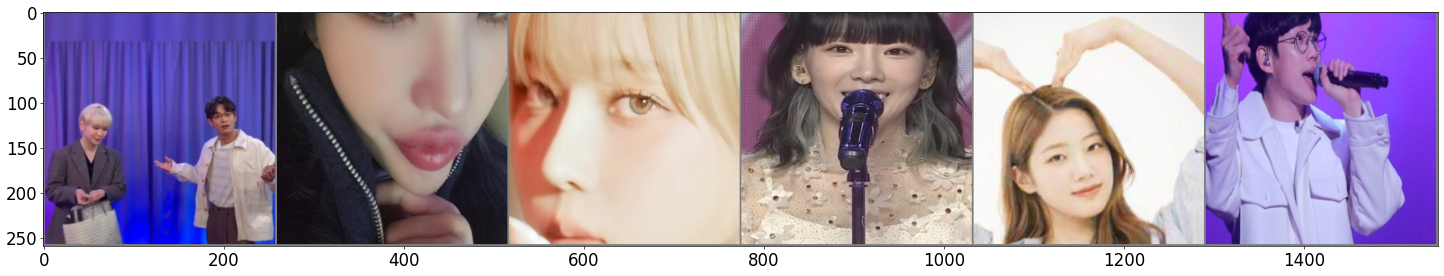

['shinee_key', 'idle_minnie', 'aespa_winter', 'gg_taeyoun', 'lesse_kazuha', '10cm']


In [ ]:
# plt.rcParams['figure.figsize'] = [30, 8]

# the default figure size for plots. figure.figsize is a parameter that determines the width and height of figures in inches. Here, it is set to 30 inches wide and 8 inches tall. This is useful for creating larger plots, especially when you need to accommodate a lot of data or annotations.

# 플롯의 기본 그림 크기를 설정합니다. figure.figsize는 인치 단위로 그림의 너비와 높이를 결정하는 매개변수입니다. 여기서는 너비 30인치, 높이 8인치로 설정됩니다. 많은 데이터나 주석을 수용해야 할 때, 특히 더 큰 플롯을 생성하는 데 유용합니다. ----------------------------

# plt.rcParams['figure.dpi'] = 60

# the default dots per inch (DPI) for figures. DPI is a measure of the resolution of a figure. A value of 60 DPI means that each inch of the figure will contain 60 dots (pixels). This setting can affect the clarity and size of the output figure.

# 그림에 대한 기본 인치당 도트 수(DPI)를 설정합니다. DPI는 그림의 해상도를 측정하는 단위입니다. 60 DPI 값은 그림의 각 인치가 60개의 점(픽셀)을 포함할 것임을 의미합니다. 이 설정은 출력 그림의 선명도와 크기에 영향을 줄 수 있습니다.

# plt.rcParams.update({'font.size': 20})

# the default font size for text in the plots to 20. This is done using the update method on plt.rcParams, which allows for updating multiple settings at once. A larger font size helps in making text more readable, especially in larger plots.

# 플롯 내의 텍스트에 대한 기본 글꼴 크기를 20으로 업데이트합니다. 이는 plt.rcParams의 update 메소드를 사용하여 수행되며, 여러 설정을 한 번에 업데이트할 수 있습니다. 더 큰 글꼴 크기는 특히 큰 플롯에서 텍스트를 더 읽기 쉽게 만드는 데 도움이 됩니다.

plt.rcParams['figure.figsize'] = [30, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

# def imshow(input):

# defines a function named imshow that takes an argument input. The input is expected to be a PyTorch tensor representing an image.

# input이라는 인수를 받는 imshow라는 함수를 정의합니다. input은 이미지를 나타내는 PyTorch 텐서로 예상됩니다. ----------

# input = input.numpy().transpose((1, 2, 0))

# converts the PyTorch tensor to a NumPy array and transposes it. PyTorch tensors for images are typically in the format (C, H, W) - Channels, Height, Width. The transpose((1, 2, 0)) rearranges this to (H, W, C) which is the format expected by matplotlib for displaying.

# PyTorch 텐서를 NumPy 배열로 변환하고 전치합니다. 이미지에 대한 PyTorch 텐서는 일반적으로 (C, H, W) - 채널, 높이, 너비 형식입니다. transpose((1, 2, 0))는 이를 matplotlib에서 표시하는 데 필요한 (H, W, C) 형식으로 재배열합니다. --------

# mean = np.array([0.5, 0.5, 0.5])
# std = np.array([0.5, 0.5, 0.5])
# input = std * input + mean

# undo the normalization that was previously applied to the image. During preprocessing, images are often normalized by subtracting the mean and dividing by the standard deviation. Here, the reverse is done to convert the image back to its original form.

# 이미지에 이전에 적용된 정규화를 취소합니다. 전처리 중에 이미지는 종종 평균을 빼고 표준 편차로 나누어 정규화됩니다. 여기서는 이미지를 원래 형태로 되돌리기 위해 반대의 작업을 수행합니다. -----------------------

#  input = np.clip(input, 0, 1)

# ensures that all values in the input array are clipped to the range [0, 1]. This is important because matplotlib expects the pixel values to be in this range for proper display.

# 입력 배열의 모든 값이 [0, 1] 범위로 클리핑되도록 합니다. matplotlib은 픽셀 값이 이 범위 내에 있을 때 제대로 표시되기 때문에 이는 중요합니다. -----------------------------------------------

# plt.imshow(input)
# plt.show()

# use Matplotlib to display the image. plt.imshow(input) displays the image, and plt.show() renders it on the screen.

# Matplotlib을 사용하여 이미지를 표시합니다. plt.imshow(input)은 이미지를 표시하고, plt.show()는 화면에 렌더링합니다.

def imshow(input):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # undo image normalization
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # display images
    plt.imshow(input)
    plt.show()


class_names = {
  0: "IU",
  1: "kimyouna",
  2: "ive_JWY",
  3: "bts_jimin",
  4: "kangdaniel",
  5: "bts_V",
  6: "astro_CEW",
  7: "rv_irene",
  8: "aespa_karina",
  9: "stkiz_hyunjin",
  10: "njs_haerin",
  11: "bp_jisoo",
  12: "ive_ahnyoojin",
  13: "rv_joy",
  14: "lesse_sakura",
  15: "bts_jungkook",
  16: "bp_jennie",
  17: "shinee_minho",
  18: "idle_minnie",
  19: "idle_yuqi",
  20: "idel_miyeon",
  21: "gg_taeyoun",
  22: "gg_yuna",
  23: "shinee_key",
  24: "shinee_taemin",
  25: "btob_yooksungjae",
  26: "kimsoohyun",
  27: "hyunbin",
  28: "10cm",
  29: "ive_gaeul",
  30: "kimtaeri",
  31: "leedongyook",
  32: "lesse_kimchaewon",
  33: "namjuhyuk",
  34: "nct_mark",
  35: "gongyoo",
  36: "kangdongwon",
  37: "lesse_kazuha",
  38: "songjungki",
  39: "aespa_winter",
  40: "twice_tzuwi",
  41: "idle_shuhwa",
  42: "parkhaejin",
  43: "paulkim",
  44: "ahnbohyun",
  45: "aespa_ningning",
  46: "itzy_yezi",
  47: "newist_minhyun",
  48: "ahnhyosub",
  49: "bp_rose"
}

# iterator = iter(train_loader)

# train_loader is a PyTorch DataLoader object. In PyTorch, a DataLoader is used to load data in batches during the training or testing of a neural network model. It handles the batching of data, shuffling (if enabled), and loading the data in parallel using multiple workers (threads).
# iter(train_loader) converts the train_loader into an iterator. An iterator in Python is an object that can be iterated upon, meaning that you can traverse through all the values. Specifically, for a DataLoader, each iteration would provide a batch of data (images and labels, in this case).
# iterator is a variable that now holds this iterator object. You can now use this iterator to loop through the dataset in batches, typically using a loop or by calling next(iterator) to get the next batch.

# train_loader는 PyTorch DataLoader 객체입니다. PyTorch에서 DataLoader는 신경망 모델의 학습이나 테스트 중에 데이터를 배치로 로드하는 데 사용됩니다. 데이터의 배치 처리, 셔플링(활성화된 경우), 그리고 여러 워커(스레드)를 사용하여 데이터를 병렬로 로드하는 작업을 처리합니다.
# iter(train_loader)는 train_loader를 반복자로 변환합니다. 파이썬에서 반복자는 반복될 수 있는 객체로, 모든 값을 순회할 수 있음을 의미합니다. 특히 DataLoader의 경우, 각 반복은 데이터의 배치(이 경우 이미지와 레이블)를 제공합니다.
# iterator는 이제 이 반복자 객체를 저장하는 변수입니다. 이제 이 반복자를 사용하여 데이터 세트를 배치 단위로 순회할 수 있으며, 일반적으로 루프를 사용하거나 next(iterator)를 호출하여 다음 배치를 가져옵니다. -------------------------------

# load a batch of train image
iterator = iter(train_loader)

# imgs, labels = next(iterator)

# retrieves the next batch of data from the iterator. The iterator was created from the train_loader, a PyTorch DataLoader. Each item from the iterator is a batch containing two elements: imgs (the images) and labels (the corresponding labels for these images). The next() function is used to get the next item from the iterator.

# iterator에서 다음 데이터 배치를 검색합니다. iterator는 PyTorch DataLoader인 train_loader에서 생성되었습니다. 반복자의 각 항목은 두 요소를 포함하는 배치입니다: imgs(이미지)와 labels(이 이미지에 해당하는 레이블). next() 함수는 반복자에서 다음 항목을 가져오는 데 사용됩니다. -------------------------------------------------

# out = torchvision.utils.make_grid(imgs[:6])

# uses the make_grid function from torchvision.utils to create a grid layout of images. imgs[:6] takes the first six images from the batch. The make_grid function arranges these images in a grid format, making it easier to visualize multiple images at once.

# torchvision.utils의 make_grid 함수를 사용하여 이미지의 그리드 레이아웃을 만듭니다. imgs[:6]은 배치에서 처음 여섯 개의 이미지를 가져옵니다. make_grid 함수는 이러한 이미지를 그리드 형식으로 배열하여 한 번에 여러 이미지를 시각화하기 쉽게 만듭니다. ------------------------------------------------------------------------------

# imshow(out)

#  This calls the imshow function (defined earlier in your code) with the grid of images as the input. The imshow function converts the tensor to a format suitable for display using Matplotlib and then displays it.

# 이것은 이미지 그리드를 입력으로 사용하여 imshow 함수(코드 앞부분에서 정의됨)를 호출합니다. imshow 함수는 텐서를 Matplotlib을 사용하여 표시하기에 적합한 형식으로 변환한 다음 표시합니다.

# print([class_names[labels[i].item()] for i in range(6)])

# prints the names of the classes corresponding to the first six labels in the batch. labels[i].item() gets the label value as a Python integer. class_names is a dictionary mapping label indices to human-readable class names. This line uses a list comprehension to create a list of class names corresponding to the labels and prints it.

# 배치의 처음 여섯 레이블에 해당하는 클래스 이름을 출력합니다. labels[i].item()은 레이블 값을 파이썬 정수로 가져옵니다. class_names는 레이블 인덱스를 사람이 읽을 수 있는 클래스 이름에 매핑하는 사전입니다. 이 줄은 레이블에 해당하는 클래스 이름의 리스트를 만들기 위해 리스트 컴프리헨션을 사용하고 그것을 출력합니다.---------------------------------------------

# visualize a batch of train image
imgs, labels = next(iterator)
out = torchvision.utils.make_grid(imgs[:6])
imshow(out)
print([class_names[labels[i].item()] for i in range(6)])

#### Define training and testing functions / 학습(Training) 및 평가(Testing) 함수 정의

In [4]:
# learning_rate = 0.002
# log_step = 20
# n_classes = 50

# learning_rate is set to 0.002, which is the step size at each iteration while moving toward a minimum of a loss function. This is a hyperparameter that controls how much to adjust the model in response to the estimated error each time the model weights are updated.
# log_step is set to 20, which could be used to determine how often to log or print out information during training (e.g., every 20 steps).
# n_classes is set to 50, indicating the number of classes in the classification task.

# learning_rate는 0.002로 설정되어 있으며, 이는 손실 함수의 최소값을 향해 이동할 때 각 반복에서의 단계 크기를 의미합니다. 이는 모델 가중치가 업데이트될 때마다 추정된 오류에 따라 모델을 얼마나 조정할지를 제어하는 하이퍼파라미터입니다.
# log_step은 20으로 설정되어 있으며, 이는 훈련 중 정보를 얼마나 자주 로그하거나 출력할지 결정하는 데 사용될 수 있습니다 (예: 20단계마다).
# n_classes는 50으로 설정되어 있으며, 분류 작업에서의 클래스 수를 나타냅니다.------------------------------------------

learning_rate = 0.002
log_step = 20
n_classes = 50

# model = models.resnet18(pretrained=True)

# initializes a ResNet18 model with pre-trained weights. models.resnet18 is a function from the torchvision library that loads the ResNet18 model. pretrained=True means the model is loaded with weights trained on ImageNet, a large dataset commonly used for pre-training models in computer vision.

# 사전 훈련된 가중치를 가진 ResNet18 모델을 초기화합니다. models.resnet18은 torchvision 라이브러리의 함수로, ResNet18 모델을 불러옵니다. pretrained=True는 ImageNet과 같은 큰 데이터셋에서 사전 훈련된 가중치로 모델을 불러온다는 것을 의미합니다.---------------------------------------------------------------------------------

model = models.resnet18(pretrained=True)

# num_features = model.fc.in_features
# model.fc = nn.Linear(num_features, n_classes)

# num_features = model.fc.in_features retrieves the number of input features for the fully connected layer of the ResNet18 model.
# model.fc = nn.Linear(num_features, n_classes) replaces the last fully connected layer of the ResNet18 model with a new one (where nn.Linear is a linear transformation). The new layer has num_features input features and n_classes output features. This is a common practice in transfer learning, where the pre-trained network is adapted to a new task with a different number of output classes.

# num_features = model.fc.in_features는 ResNet18 모델의 완전 연결 계층에 대한 입력 특징의 수를 검색합니다.
# model.fc = nn.Linear(num_features, n_classes)는 ResNet18 모델의 마지막 완전 연결 계층을 새로운 것으로 교체합니다 (nn.Linear는 선형 변환입니다). 새 계층은 num_features 입력 특징과 n_classes 출력 특징을 가집니다. 이는 전이 학습에서 일반적인 관행으로, 사전 훈련된 네트워크를 새로운 작업에 맞게 조정합니다. --------------------------------------------------

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, n_classes) # transfer learning

# model = model.cuda()

# moves the model to the GPU, enabling CUDA acceleration. This is assuming that CUDA-compatible hardware is available and PyTorch is configured to use it. It's essential for efficient computation with large neural networks and datasets.

# 모델을 GPU로 이동시켜 CUDA 가속을 가능하게 합니다. 이는 CUDA 호환 하드웨어가 사용 가능하고 PyTorch가 이를 사용하도록 설정되어 있다고 가정합니다. 큰 신경망과 데이터셋으로 효율적인 계산을 위해 필수적입니다. -----------------------------

model = model.cuda()

# criterion = nn.CrossEntropyLoss()

# defines the loss function to be used for the training. nn.CrossEntropyLoss is a common loss function for classification tasks, which combines a softmax activation and a cross-entropy loss in one single class.

# 훈련에 사용될 손실 함수를 정의합니다. nn.CrossEntropyLoss는 분류 작업에 일반적으로 사용되는 손실 함수로, 소프트맥스 활성화와 교차 엔트로피 손실을 하나의 클래스로 결합합니다. -----------------------------------------------

criterion = nn.CrossEntropyLoss()

# optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# sets up the optimizer, which is the algorithm used to update the weights of the network during training. Here, Stochastic Gradient Descent (SGD) is used with the specified learning_rate and a momentum of 0.9. Momentum helps accelerate SGD in the relevant direction and dampens oscillations.

# 네트워크의 가중치를 훈련 중에 업데이트하는 데 사용되는 알고리즘인 최적화기를 설정합니다. 여기서는 지정된 learning_rate와 0.9의 모멘텀을 사용하여 확률적 경사 하강법(SGD)이 사용됩니다. 모멘텀은 SGD를 관련 방향으로 가속화하고 진동을 감소시키는 데 도움이 됩니다. ----------------------------------------------------------

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 206MB/s]


In [5]:
import time


def train():
    start_time = time.time()
    print(f'[Epoch: {epoch + 1} - Training]')
    model.train()
    total = 0
    running_loss = 0.0
    running_corrects = 0

    for i, batch in enumerate(train_loader):
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()

        outputs = model(imgs)
        optimizer.zero_grad()
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if i % log_step == log_step - 1:
            print(f'[Batch: {i + 1}] running train loss: {running_loss / total}, running train accuracy: {running_corrects / total}')

    print(f'train loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()


def validate():
    start_time = time.time()
    print(f'[Epoch: {epoch + 1} - Validation]')
    model.eval()
    total = 0
    running_loss = 0.0
    running_corrects = 0

    for i, batch in enumerate(val_loader):
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()

        with torch.no_grad():
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if (i == 0) or (i % log_step == log_step - 1):
            print(f'[Batch: {i + 1}] running val loss: {running_loss / total}, running val accuracy: {running_corrects / total}')

    print(f'val loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()


def test():
    start_time = time.time()
    print(f'[Test]')
    model.eval()
    total = 0
    running_loss = 0.0
    running_corrects = 0

    for i, batch in enumerate(test_loader):
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()

        with torch.no_grad():
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if (i == 0) or (i % log_step == log_step - 1):
            print(f'[Batch: {i + 1}] running test loss: {running_loss / total}, running test accuracy: {running_corrects / total}')

    print(f'test loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()

### def train(): 신경망 모델을 훈련하는 `train` 함수를 정의한다.

### English Explanation
1. `def train():`: Defines the function `train`.
2. `start_time = time.time()`: Records the current time to measure the duration of the training process.
3. `print(f'[Epoch: {epoch + 1} - Training]')`: Prints the current epoch number, indicating the start of training for this epoch.
4. `model.train()`: Sets the model to training mode, enabling features like dropout and batch normalization.
5. `total = 0`, `running_loss = 0.0`, `running_corrects = 0`: Initializes variables to track the total number of samples, cumulative loss, and correct predictions.
6. `for i, batch in enumerate(train_loader):`: Iterates over the training data loader, retrieving batches of images and labels.
7. `imgs, labels = batch`: Unpacks the images and labels from the current batch.
8. `imgs, labels = imgs.cuda(), labels.cuda()`: Moves the images and labels to the GPU for faster computation.
9. `outputs = model(imgs)`: Passes the images through the model to get predictions.
10. `optimizer.zero_grad()`: Resets the gradients of the model parameters to zero.
11. `_, preds = torch.max(outputs, 1)`: Determines the predicted class by finding the maximum value in the output logits.
12. `loss = criterion(outputs, labels)`: Computes the loss between the model predictions and the true labels.
13. `loss.backward()`: Performs backpropagation, calculating the gradients of the loss with respect to the model parameters.
14. `optimizer.step()`: Updates the model parameters using the calculated gradients.
15. `total += labels.shape[0]`: Updates the total count of processed samples.
16. `running_loss += loss.item()`: Adds the current loss to the cumulative loss.
17. `running_corrects += torch.sum(preds == labels.data)`: Counts the number of correct predictions in the current batch.
18. `if i % log_step == log_step - 1:`: Checks if it's time to print the training progress.
19. `print(...)`: Prints the current training loss and accuracy.
20. `return running_loss / total, (running_corrects / total).item()`: Returns the average loss and accuracy for the epoch.

### 한국어 설명
1. `def train():`: `train` 함수를 정의합니다.
2. `start_time = time.time()`: 훈련 과정의 지속 시간을 측정하기 위해 현재 시간을 기록합니다.
3. `print(f'[Epoch: {epoch + 1} - Training]')`: 현재 에포크 번호를 출력하여 이 에포크의 훈련 시작을 알립니다.
4. `model.train()`: 모델을 훈련 모드로 설정하여 드롭아웃과 배치 정규화와 같은 기능을 활성화합니다.
5. `total = 0`, `running_loss = 0.0`, `running_corrects = 0`: 총 샘플 수, 누적 손실, 정확한 예측 수를 추적하기 위한 변수를 초기화합니다.
6. `for i, batch in enumerate(train_loader):`: 훈련 데이터 로더를 반복하여 이미지와 레이블의 배치를 검색합니다.
7. `imgs, labels = batch`: 현재 배치에서 이미지와 레이블을 추출합니다.
8. `imgs, labels = imgs.cuda(), labels.cuda()`: 이미지와 레이블을 GPU로 이동하여 더 빠른 계산을 수행합니다.
9. `outputs = model(imgs)`: 모델을 통해 이미지를 전달하여 예측을 얻습니다.
10. `optimizer.zero_grad()`: 모델 매개변수의 기울기를 0으로 재설정합니다.
11. `_, preds = torch.max(outputs, 1)`: 출력 로짓에서 최대값을 찾아 예측된 클래스를 결정합니다.
12. `loss = criterion(outputs, labels)`: 모델 예측과 실제 레이블 간의 손실을 계산합니다.
13. `loss.backward()`: 역전파를 수행하여 모델 매개변수에 대한 손실의 기울기를 계산합니다.
14. `optimizer.step()`: 계산된 기울기를 사용하여 모델 매개변수를 업데이트합니다.
15. `total += labels.shape[0]`: 처리된 샘플의 총 수를 업데이트합니다.
16. `running_loss += loss.item()`: 현재 손실을 누적 손실에 추가합니다.
17. `running_corrects += torch.sum(preds == labels.data)`: 현재 배치에서 정확한 예측 수를 계산합니다.
18. `if i % log_step == log_step - 1:`: 훈련 진행 상황을 출력할 시간인지 확인합니다.
19. `print(...)`: 현재 훈련 손실과 정확도를 출력합니다.
20. `return running_loss / total, (running_corrects / total).item()`: 에포크에 대한 평균 손실과 정확도를 반환합니다.

### def validate(): 신경망 모델의 검증 과정을 수행하는 `validate` 함수를 정의합니다.

### English Explanation
1. `def validate():`: Defines the function `validate`.
2. `start_time = time.time()`: Records the current time to measure the duration of the validation process.
3. `print(f'[Epoch: {epoch + 1} - Validation]')`: Prints the current epoch number, indicating the start of validation for this epoch.
4. `model.eval()`: Sets the model to evaluation mode, disabling features like dropout and batch normalization.
5. `total = 0`, `running_loss = 0.0`, `running_corrects = 0`: Initializes variables to track the total number of samples, cumulative loss, and correct predictions during validation.
6. `for i, batch in enumerate(val_loader):`: Iterates over the validation data loader, retrieving batches of images and labels.
7. `imgs, labels = batch`: Unpacks the images and labels from the current batch.
8. `imgs, labels = imgs.cuda(), labels.cuda()`: Moves the images and labels to the GPU for faster computation.
9. `with torch.no_grad():`: Disables gradient calculations, which are not needed during validation.
10. `outputs = model(imgs)`: Passes the images through the model to get predictions.
11. `_, preds = torch.max(outputs, 1)`: Determines the predicted class by finding the maximum value in the output logits.
12. `loss = criterion(outputs, labels)`: Computes the loss between the model predictions and the true labels.
13. `total += labels.shape[0]`: Updates the total count of processed samples.
14. `running_loss += loss.item()`: Adds the current loss to the cumulative loss.
15. `running_corrects += torch.sum(preds == labels.data)`: Counts the number of correct predictions in the current batch.
16. `if (i == 0) or (i % log_step == log_step - 1):`: Checks if it's time to print the validation progress.
17. `print(...)`: Prints the current validation loss and accuracy.
18. `return running_loss / total, (running_corrects / total).item()`: Returns the average loss and accuracy for the validation.

### 한국어 설명
1. `def validate():`: `validate` 함수를 정의합니다.
2. `start_time = time.time()`: 검증 과정의 지속 시간을 측정하기 위해 현재 시간을 기록합니다.
3. `print(f'[Epoch: {epoch + 1} - Validation]')`: 현재 에포크 번호를 출력하여 이 에포크의 검증 시작을 알립니다.
4. `model.eval()`: 모델을 평가 모드로 설정하여 드롭아웃과 배치 정규화와 같은 기능을 비활성화합니다.
5. `total = 0`, `running_loss = 0.0`, `running_corrects = 0`: 검증 동안 총 샘플 수, 누적 손실, 정확한 예측 수를 추적하기 위한 변수를 초기화합니다.
6. `for i, batch in enumerate(val_loader):`: 검증 데이터 로더를 반복하여 이미지와 레이블의 배치를 검색합니다.
7. `imgs, labels = batch`: 현재 배치에서 이미지와 레이블을 추출합니다.
8. `imgs, labels = imgs.cuda(), labels.cuda()`: 이미지와 레이블을 GPU로 이동하여 더 빠른 계산을 수행합니다.
9. `with torch.no_grad():`: 검증 중에는 필요하지 않은 기울기 계산을 비활성화합니다.
10. `outputs = model(imgs)`: 모델을 통해 이미지를 전달하여 예측을 얻습니다.
11. `_, preds = torch.max(outputs, 1)`: 출력 로짓에서 최대값을 찾아 예측된 클래스를 결정합니다.
12. `loss = criterion(outputs, labels)`: 모델 예측과 실제 레이블 간의 손실을 계산합니다.
13. `total += labels.shape[0]`: 처리된 샘플의 총 수를 업데이트합니다.
14. `running_loss += loss.item()`: 현재 손실을 누적 손실에 추가합니다.
15. `running_corrects += torch.sum(preds == labels.data)`: 현재 배치에서 정확한 예측 수를 계산합니다.
16. `if (i == 0) or (i % log_step == log_step - 1):`: 검증 진행 상황을 출력할 시간인지 확인합니다.
17. `print(...)`: 현재 검증 손실과 정확도를 출력합니다.
18. `return running_loss / total, (running_corrects / total).item()`: 검증에 대한 평균 손실과 정확도를 반환합니다.

### def test(): is `test` function in your code. This is designed to evaluate the performance of the trained model on a test dataset.

### English Explanation
1. `def test():`: Defines the `test` function.
2. `start_time = time.time()`: Records the current time to measure the duration of the test process.
3. `print(f'[Test]')`: Prints a message indicating the start of the testing phase.
4. `model.eval()`: Sets the model to evaluation mode, which is important for certain layers like dropout and batch normalization that behave differently during training and testing.
5. `total = 0`, `running_loss = 0.0`, `running_corrects = 0`: Initializes variables to keep track of the total number of samples, cumulative loss, and number of correct predictions.
6. `for i, batch in enumerate(test_loader):`: Iterates over the test dataset using the test data loader.
7. `imgs, labels = batch`: Extracts images and labels from the current batch.
8. `imgs, labels = imgs.cuda(), labels.cuda()`: Moves the images and labels to the GPU for faster computation.
9. `with torch.no_grad():`: Disables gradient computation, which is not needed during testing and saves memory and computation.
10. `outputs = model(imgs)`: Passes the images through the model to obtain predictions.
11. `_, preds = torch.max(outputs, 1)`: Determines the predicted class by finding the index of the maximum value in the output logits.
12. `loss = criterion(outputs, labels)`: Calculates the loss between the model predictions and the actual labels.
13. `total += labels.shape[0]`: Updates the total number of processed samples.
14. `running_loss += loss.item()`: Adds the current batch's loss to the cumulative loss.
15. `running_corrects += torch.sum(preds == labels.data)`: Counts the number of correct predictions in the current batch.
16. `if (i == 0) or (i % log_step == log_step - 1):`: Checks if it's time to print the test progress.
17. `print(...)`: Prints the current test loss and accuracy.
18. `return running_loss / total, (running_corrects / total).item()`: Returns the average loss and accuracy for the test dataset.

### 한국어 설명
1. `def test():`: `test` 함수를 정의합니다.
2. `start_time = time.time()`: 테스트 과정의 지속 시간을 측정하기 위해 현재 시간을 기록합니다.
3. `print(f'[Test]')`: 테스트 단계 시작을 알리는 메시지를 출력합니다.
4. `model.eval()`: 모델을 평가 모드로 설정합니다. 이는 훈련과 테스트 시 다르게 동작하는 드롭아웃과 배치 정규화와 같은 특정 레이어에 중요합니다.
5. `total = 0`, `running_loss = 0.0`, `running_corrects = 0`: 총 샘플 수, 누적 손실, 정확한 예측 수를 추적하기 위한 변수를 초기화합니다.
6. `for i, batch in enumerate(test_loader):`: 테스트 데이터 로더를 사용하여 테스트 데이터셋을 반복합니다.
7. `imgs, labels = batch`: 현재 배치에서 이미지와 레이블을 추출합니다.
8. `imgs, labels = imgs.cuda(), labels.cuda()`: 이미지와 레이블을 GPU로 이동하여 더 빠른 계산을 수행합니다.
9. `with torch.no_grad():`: 테스트 중에는 필요하지 않은 기울기 계산을 비활성화하여 메모리와 계산을 절약합니다.
10. `outputs = model(imgs)`: 이미지를 모델에 전달하여 예측을 얻습니다.
11. `_, preds = torch.max(outputs, 1)`: 출력 로짓에서 최대값의 인덱스를 찾아 예측된 클래스를 결정합니다.
12. `loss = criterion(outputs, labels)`: 모델 예측과 실제 레이블 간의 손실을 계산합니다.
13. `total += labels.shape[0]`: 처리된 샘플의 총 수를 업데이트합니다.
14. `running_loss += loss.item()`: 현재 배치의 손실을 누적 손실에 추가합니다.
15. `running_corrects += torch.sum(preds == labels.data)`: 현재 배치에서 정확한 예측 수를 계산합니다.
16. `if (i == 0) or (i % log_step == log_step - 1):`: 테스트 진행 상황을 출력할 시간인지 확인합니다.
17. `print(...)`: 현재 테스트 손실과 정확도를 출력합니다.
18. `return running_loss / total, (running_corrects / total).item()`: 테스트 데이터셋에 대한 평균 손실과 정확도를 반환합니다.

In [ ]:
import time

def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 5:
        lr /= 10
    if epoch >= 10:
        lr /= 10
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


num_epochs = 25
best_val_acc = 0
best_epoch = 0

history = []
accuracy = []
for epoch in range(num_epochs):
    adjust_learning_rate(optimizer, epoch)
    train_loss, train_acc = train()
    val_loss, val_acc = validate()
    history.append((train_loss, val_loss))
    accuracy.append((train_acc, val_acc))

    if val_acc > best_val_acc:
        print("[Info] best validation accuracy!")
        best_val_acc = val_acc
        best_epoch = epoch
        torch.save(model.state_dict(), f'best_checkpoint_epoch_{epoch + 1}.pth')

torch.save(model.state_dict(), f'ResNet18_best_epoch.pth')

#### def adjust_learning_rate(optimizer, epoch): is The `adjust_learning_rate` function in your code. This is designed to adjust the learning rate of the optimizer during training, based on the current epoch. This is a common technique used in training neural networks to fine-tune the learning process.

#### def adjust_learning_rate(optimizer, epoch): 는 훈련 중에 현재 에폭을 기반으로 옵티마이저의 학습률을 조정하는 것으로 설계되었습니다. 이는 학습 과정을 미세 조정하기 위해 신경망 훈련에서 흔히 사용되는 기법입니다.

### English Explanation
1. `import time`: Imports the `time` module, which provides various time-related functions. It's not directly used in this function, but it might be used elsewhere in your code.
2. `def adjust_learning_rate(optimizer, epoch):`: Defines the function `adjust_learning_rate` with two parameters: `optimizer` (the optimizer used for training the model) and `epoch` (the current epoch number).
3. `lr = learning_rate`: Initializes the learning rate (`lr`) with the value of `learning_rate`, which is presumably a global variable set elsewhere in your code.
4. `if epoch >= 5:`: Checks if the current epoch number is 5 or higher.
5. `lr /= 10`: If the current epoch is 5 or higher, the learning rate is reduced to one-tenth of its previous value.
6. `if epoch >= 10:`: Checks if the current epoch number is 10 or higher.
7. `lr /= 10`: If the current epoch is 10 or higher, the learning rate is further reduced to one-tenth of its value after the first reduction.
8. `for param_group in optimizer.param_groups:`: Iterates over each parameter group in the optimizer. Optimizers in PyTorch can have multiple parameter groups, each with its own learning rate and other settings.
9. `param_group['lr'] = lr`: Sets the learning rate of the current parameter group to the newly adjusted learning rate.

### 한국어 설명
1. `import time`: `time` 모듈을 가져옵니다. 이 모듈은 다양한 시간 관련 함수를 제공합니다. 이 함수에서 직접 사용되지는 않지만, 코드의 다른 부분에서 사용될 수 있습니다.
2. `def adjust_learning_rate(optimizer, epoch):`: `adjust_learning_rate` 함수를 정의합니다. 이 함수는 두 개의 매개변수를 가집니다: `optimizer` (모델 훈련에 사용되는 최적화 도구)와 `epoch` (현재 에포크 번호).
3. `lr = learning_rate`: 학습률(`lr`)을 `learning_rate`의 값으로 초기화합니다. `learning_rate`는 코드의 다른 곳에서 설정된 전역 변수로 추정됩니다.
4. `if epoch >= 5:`: 현재 에포크 번호가 5 이상인지 확인합니다.
5. `lr /= 10`: 현재 에포크가 5 이상이면 학습률을 이전 값의 1/10로 줄입니다.
6. `if epoch >= 10:`: 현재 에포크 번호가 10 이상인지 확인합니다.
7. `lr /= 10`: 현재 에포크가 10 이상이면 학습률을 첫 번째 감소 후의 값의 1/10로 더 줄입니다.
8. `for param_group in optimizer.param_groups:`: 최적화 도구의 각 매개변수 그룹을 반복합니다. PyTorch의 최적화 도구는 각각 자체 학습률 및 기타 설정을 가진 여러 매개변수 그룹을 가질 수 있습니다.
9. `param_group['lr'] = lr`: 현재 매개변수 그룹의 학습률을 새로 조정된 학습률로 설정합니다.

#### This code block is the main training loop for your neural network model. It iterates through a specified number of epochs, training and validating the model in each epoch, and saves the model's state when it achieves the best validation accuracy.

#### 이 코드 블록은 신경망 모델을 위한 주요 학습 루프입니다. 지정된 에포크 수만큼 반복하여 각 에포크에서 모델을 훈련시키고 검증하며, 최고의 검증 정확도를 달성했을 때 모델의 상태를 저장합니다.

### English Explanation
1. `num_epochs = 25`: Sets the total number of epochs for training the model to 25.
2. `best_val_acc = 0`: Initializes the best validation accuracy to 0. This will be used to track the highest accuracy achieved on the validation set.
3. `best_epoch = 0`: Initializes the epoch number at which the best validation accuracy was achieved.
4. `history = []`: Initializes a list to store the history of training and validation losses.
5. `accuracy = []`: Initializes a list to store the history of training and validation accuracies.
6. `for epoch in range(num_epochs):`: Starts a loop that will iterate for the number of epochs specified by `num_epochs`.
7. `adjust_learning_rate(optimizer, epoch)`: Adjusts the learning rate of the optimizer for the current epoch.
8. `train_loss, train_acc = train()`: Calls the `train` function to train the model for one epoch, and gets the training loss and accuracy.
9. `val_loss, val_acc = validate()`: Calls the `validate` function to evaluate the model on the validation set, and gets the validation loss and accuracy.
10. `history.append((train_loss, val_loss))`: Appends the training and validation losses to the `history` list.
11. `accuracy.append((train_acc, val_acc))`: Appends the training and validation accuracies to the `accuracy` list.
12. `if val_acc > best_val_acc:`: Checks if the current validation accuracy is greater than the best validation accuracy achieved so far.
13. `print("[Info] best validation accuracy!")`: If the current validation accuracy is the best so far, prints a message.
14. `best_val_acc = val_acc`: Updates the best validation accuracy.
15. `best_epoch = epoch`: Updates the epoch number at which the best validation accuracy was achieved.
16. `torch.save(model.state_dict(), f'best_checkpoint_epoch_{epoch + 1}.pth')`: Saves the model's state dictionary at the current epoch if it has the best validation accuracy so far.
17. `torch.save(model.state_dict(), f'ResNet18_best_epoch.pth')`: After completing all epochs, saves the model's state dictionary.

### 한국어 설명
1. `num_epochs = 25`: 모델 훈련을 위한 총 에포크 수를 25로 설정합니다.
2. `best_val_acc = 0`: 최고 검증 정확도를 0으로 초기화합니다. 이는 검증 세트에서 달성된 가장 높은 정확도를 추적하는 데 사용됩니다.
3. `best_epoch = 0`: 최고 검증 정확도가 달성된 에포크 번호를 초기화합니다.
4. `history = []`: 훈련 및 검증 손실의 이력을 저장하기 위한 리스트를 초기화합니다.
5. `accuracy = []`: 훈련 및 검증 정확도의 이력을 저장하기 위한 리스트를 초기화합니다.
6. `for epoch in range(num_epochs):`: `num_epochs`에 의해 지정된 에포크 수만큼 반복할 루프를 시작합니다.
7. `adjust_learning_rate(optimizer, epoch)`: 현재 에포크에 대한 최적화 도구의 학습률을 조정합니다.
8. `train_loss, train_acc = train()`: 한 에포크 동안 모델을 훈련시키기 위해 `train` 함수를 호출하고, 훈련 손실과 정확도를 얻습니다.
9. `val_loss, val_acc = validate()`: 검증 세트에서 모델을 평가하기 위해 `validate` 함수를 호출하고, 검증 손실과 정확도를 얻습니다.
10. `history.append((train_loss, val_loss))`: 훈련 및 검증 손실을 `history` 리스트에 추가합니다.
11. `accuracy.append((train_acc, val_acc))`: 훈련 및 검증 정확도를 `accuracy` 리스트에 추가합니다.
12. `if val_acc > best_val_acc:`: 현재 검증 정확도가 지금까지 달성된 최고 검증 정확도보다 높은지 확인합니다.
13. `print("[Info] best validation accuracy!")`: 현재 검증 정확도가 지금까지의 최고라면 메시지를 출력합니다.
14. `best_val_acc = val_acc`: 최고 검증 정확도를 업데이트합니다.
15. `best_epoch = epoch`: 최고 검증 정확도가 달성된 에포크 번호를 업데이트합니다.
16. `torch.save(model.state_dict(), f'best_checkpoint_epoch_{epoch + 1}.pth')`: 현재 에포크에서 최고의 검증 정확도를 달성한 경우 모델의 상태 딕셔너리를 저장합니다.
17. `torch.save(model.state_dict(), f'ResNet18_best_epoch.pth')`: 모든 에포크를 완료한 후 모델의 상태 딕셔너리를 저장합니다.

In [ ]:
# Visualize train, validation's comparison of Epochs and Loss
plt.plot([x[0] for x in history], 'b', label='train')
plt.plot([x[1] for x in history], 'r--',label='validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### This code block is for plotting the training and validation loss over epochs using Matplotlib, a popular plotting library in Python.

#### 이 코드 블록은 Python의 인기 있는 그래프 라이브러리인 Matplotlib를 사용하여 에포크에 따른 훈련 및 검증 손실을 그리기 위한 것입니다.

### English Explanation
1. `plt.plot([x[0] for x in history], 'b', label='train')`: This line plots the training loss. `[x[0] for x in history]` extracts the training loss from each epoch's data stored in the `history` list. The `'b'` argument sets the color of the line to blue, and `label='train'` sets the label for this plot as "train".
2. `plt.plot([x[1] for x in history], 'r--', label='validation')`: This line plots the validation loss. `[x[1] for x in history]` extracts the validation loss from each epoch's data. The `'r--'` argument sets the color of the line to red and the line style to dashed, and `label='validation'` sets the label for this plot as "validation".
3. `plt.xlabel("Epochs")`: Sets the label for the x-axis as "Epochs".
4. `plt.ylabel("Loss")`: Sets the label for the y-axis as "Loss".
5. `plt.legend()`: Adds a legend to the plot. The legend uses the labels defined earlier ("train" and "validation").

### 한국어 설명
1. `plt.plot([x[0] for x in history], 'b', label='train')`: 이 줄은 훈련 손실을 그립니다. `[x[0] for x in history]`는 `history` 리스트에 저장된 각 에포크의 데이터에서 훈련 손실을 추출합니다. `'b'` 인자는 선의 색상을 파란색으로 설정하고, `label='train'`은 이 그래프의 레이블을 "train"으로 설정합니다.
2. `plt.plot([x[1] for x in history], 'r--', label='validation')`: 이 줄은 검증 손실을 그립니다. `[x[1] for x in history]`는 각 에포크의 데이터에서 검증 손실을 추출합니다. `'r--'` 인자는 선의 색상을 빨간색으로, 선 스타일을 점선으로 설정하고, `label='validation'`은 이 그래프의 레이블을 "validation"으로 설정합니다.
3. `plt.xlabel("Epochs")`: x축의 레이블을 "Epochs"로 설정합니다.
4. `plt.ylabel("Loss")`: y축의 레이블을 "Loss"로 설정합니다.
5. `plt.legend()`: 그래프에 범례를 추가합니다. 범례는 앞서 정의된 레이블("train" 및 "validation")을 사용합니다.

#### This plot will help you visually assess how the training and validation loss change over the epochs, which is crucial for understanding the learning process and diagnosing issues like overfitting or underfitting.

#### 이 그래프는 에포크에 따라 훈련 및 검증 손실이 어떻게 변하는지 시각적으로 평가하는 데 도움이 되며, 학습 과정을 이해하고 과적합이나 과소적합과 같은 문제를 진단하는 데 필수적입니다.

In [ ]:
# Visualize train, validation's comparison of Epochs and Accuracy
plt.plot([x[0] for x in accuracy], 'b', label='train')
plt.plot([x[1] for x in accuracy], 'r--',label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### This code block is for plotting the training and validation accuracy over epochs using Matplotlib.

#### 이 코드 블록은 Python의 Matplotlib을 사용하여 에포크에 따른 훈련 및 검증 정확도를 그리기 위한 것입니다.

### English Explanation
1. `plt.plot([x[0] for x in accuracy], 'b', label='train')`: This line plots the training accuracy. `[x[0] for x in accuracy]` extracts the training accuracy from each epoch's data stored in the `accuracy` list. The `'b'` argument sets the color of the line to blue, and `label='train'` sets the label for this plot as "train".
2. `plt.plot([x[1] for x in accuracy], 'r--', label='validation')`: This line plots the validation accuracy. `[x[1] for x in accuracy]` extracts the validation accuracy from each epoch's data. The `'r--'` argument sets the color of the line to red and the line style to dashed, and `label='validation'` sets the label for this plot as "validation".
3. `plt.xlabel("Epochs")`: Sets the label for the x-axis as "Epochs".
4. `plt.ylabel("Accuracy")`: Sets the label for the y-axis as "Accuracy".
5. `plt.legend()`: Adds a legend to the plot. The legend uses the labels defined earlier ("train" and "validation").

### 한국어 설명
1. `plt.plot([x[0] for x in accuracy], 'b', label='train')`: 이 줄은 훈련 정확도를 그립니다. `[x[0] for x in accuracy]`는 `accuracy` 리스트에 저장된 각 에포크의 데이터에서 훈련 정확도를 추출합니다. `'b'` 인자는 선의 색상을 파란색으로 설정하고, `label='train'`은 이 그래프의 레이블을 "train"으로 설정합니다.
2. `plt.plot([x[1] for x in accuracy], 'r--', label='validation')`: 이 줄은 검증 정확도를 그립니다. `[x[1] for x in accuracy]`는 각 에포크의 데이터에서 검증 정확도를 추출합니다. `'r--'` 인자는 선의 색상을 빨간색으로, 선 스타일을 점선으로 설정하고, `label='validation'`은 이 그래프의 레이블을 "validation"으로 설정합니다.
3. `plt.xlabel("Epochs")`: x축의 레이블을 "Epochs"로 설정합니다.
4. `plt.ylabel("Accuracy")`: y축의 레이블을 "Accuracy"로 설정합니다.
5. `plt.legend()`: 그래프에 범례를 추가합니다. 범례는 앞서 정의된 레이블("train" 및 "validation")을 사용합니다.

#### This plot will visually show how the training and validation accuracy evolve over the epochs, which is essential for evaluating the performance of the model and understanding if it's learning effectively.

#### 이 그래프는 에포크에 따라 훈련 및 검증 정확도가 어떻게 발전하는지 시각적으로 보여주며, 모델의 성능을 평가하고 효과적으로 학습하고 있는지 이해하는 데 필수적입니다.

In [ ]:
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 50) # transfer learning
model = model.cuda()
model_path = 'ResNet18_best_epoch.pth'
model.load_state_dict(torch.load(model_path))

test_loss, test_accuracy = test()
print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

#### 이 코드 블록은 사전 훈련된 ResNet18 모델을 불러오고, 특정 작업(50개의 출력 클래스가 있는)에 맞게 수정한 후, 저장된 파일에서 가장 좋은 모델 가중치를 불러와 테스트 데이터셋에서 이 모델을 평가하는 데 사용됩니다.

### English

1. `model = models.resnet18(pretrained=True)`
   - This line initializes a ResNet18 model with pre-trained weights. The `pretrained=True` parameter loads the model with weights that have been trained on a large dataset (ImageNet), which helps in achieving better initial performance.

2. `num_features = model.fc.in_features`
   - Here, the number of input features for the model's final fully connected layer is retrieved. This is important for adapting the model to a new task with a different number of output classes.

3. `model.fc = nn.Linear(num_features, 50)`
   - This line replaces the model's final fully connected layer with a new one that has 50 output features. This is a form of transfer learning, adapting the pre-trained model to a new task with 50 classes.

4. `model = model.cuda()`
   - This moves the model to the GPU, enabling faster computation. This is a standard practice when working with CUDA-capable GPUs and PyTorch.

5. `model_path = 'ResNet18_best_epoch.pth'`
   - This sets the file path for the saved model weights.

6. `model.load_state_dict(torch.load(model_path))`
   - This loads the saved model weights from the specified path. `torch.load` is used to load the model state dictionary, and `load_state_dict` applies these weights to the model.

7. `test_loss, test_accuracy = test()`
   - This line calls the `test` function, which evaluates the model on the test dataset. It returns the test loss and accuracy.

8. `print(f"Test loss: {test_loss:.8f}")`
   - Prints the test loss, formatted to eight decimal places.

9. `print(f"Test accuracy: {test_accuracy * 100.:.2f}%")`
   - Prints the test accuracy as a percentage, formatted to two decimal places.

### 한국어

1. `model = models.resnet18(pretrained=True)`
   - 이 줄은 사전 훈련된 가중치를 가진 ResNet18 모델을 초기화합니다. `pretrained=True` 매개변수는 대규모 데이터셋(ImageNet)에서 훈련된 가중치로 모델을 로드하여 초기 성능을 향상시키는 데 도움이 됩니다.

2. `num_features = model.fc.in_features`
   - 여기서는 모델의 마지막 완전 연결 레이어의 입력 특성 수를 검색합니다. 다른 수의 출력 클래스를 가진 새로운 작업에 모델을 적용하는 데 중요합니다.

3. `model.fc = nn.Linear(num_features, 50)`
   - 이 줄은 모델의 마지막 완전 연결 레이어를 50개의 출력 특성을 가진 새로운 레이어로 교체합니다. 이는 사전 훈련된 모델을 50개 클래스를 가진 새로운 작업에 적용하는 형태의 전달 학습입니다.

4. `model = model.cuda()`
   - 이 명령어는 모델을 GPU로 이동시켜 더 빠른 계산을 가능하게 합니다. CUDA를 지원하는 GPU와 PyTorch를 사용할 때 표준적인 방법입니다.

5. `model_path = 'ResNet18_best_epoch.pth'`
   - 이는 저장된 모델 가중치의 파일 경로를 설정합니다.

6. `model.load_state_dict(torch.load(model_path))`
   - 지정된 경로에서 저장된 모델 가중치를 로드합니다. `torch.load`는 모델 상태 사전을 로드하는 데 사용되며, `load_state_dict`는 이 가중치를 모델에 적용합니다.

7. `test_loss, test_accuracy = test()`
   - 이 줄은 테스트 데이터셋에서 모델을 평가하는 `test` 함수를 호출합니다. 테스트 손실과 정확도를 반환합니다.

8. `print(f"Test loss: {test_loss:.8f}")`
   - 테스트 손실을 8자리 소수점으로 출력합니다.

9. `print(f"Test accuracy: {test_accuracy * 100.:.2f}%")`
   - 테스트 정확도를 백분율로 출력하며, 소수점 둘째 자리까지 표시합니다.

In [6]:
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, n_classes) # Transfer learning
model = model.cuda()
model_path = '/content/drive/MyDrive/korea_influencer/ResNet18_best_epoch.pth'
model.load_state_dict(torch.load(model_path))

# Define the test function to calculate top-3 accuracy
def test_top3():
    model.eval()
    top3_correct = 0
    total_samples = 0

    with torch.no_grad():
        for data in test_loader:  # Assuming you have a test_loader for your dataset
            inputs, labels = data
            inputs, labels = inputs.cuda(), labels.cuda()

            outputs = model(inputs)
            _, predictions = outputs.topk(3, 1)  # Get the top-3 predictions

            total_samples += labels.size(0)
            top3_correct += torch.sum(predictions.eq(labels.view(-1, 1)))

    top3_accuracy = top3_correct / total_samples
    return top3_accuracy

# Call the test_top3 function to get the top-3 accuracy
top3_accuracy = test_top3()

# Print the top-5 accuracy
print(f"Top-3 accuracy: {top3_accuracy * 100:.2f}%")

Top-3 accuracy: 78.98%


### Brief Explanation in English
This code block involves loading a pre-trained ResNet18 model, adapting it for a task with 50 output classes (a common transfer learning approach), and loading the best model weights. It then defines a function to calculate the top-3 accuracy on a test dataset and prints the top-3 accuracy.

### Detailed Explanation in English
1. `model = models.resnet18(pretrained=True)`: Loads a pre-trained ResNet18 model.
2. `num_features = model.fc.in_features`: Retrieves the number of input features for the final fully connected (fc) layer.
3. `model.fc = nn.Linear(num_features, n_classes)`: Replaces the final fc layer with a new one that outputs `n_classes` (50 in this case) for transfer learning.
4. `model = model.cuda()`: Moves the model to GPU for faster computation.
5. `model_path = '/content/drive/MyDrive/korea_influencer/ResNet18_best_epoch.pth'`: Specifies the path to the saved model weights.
6. `model.load_state_dict(torch.load(model_path))`: Loads the saved model weights into the ResNet18 model.
7. `def test_top3()`: Defines a function to calculate the top-3 accuracy.
8. Inside `test_top3`, `model.eval()`: Puts the model in evaluation mode.
9. `top3_correct = 0; total_samples = 0`: Initializes counters for correct predictions and total samples.
10. `with torch.no_grad()`: Disables gradient calculations (to save memory and computations).
11. `for data in test_loader`: Iterates over the test dataset.
12. `inputs, labels = data`: Unpacks the data into inputs and labels.
13. `inputs, labels = inputs.cuda(), labels.cuda()`: Moves data to GPU.
14. `outputs = model(inputs)`: Gets the model's predictions for the inputs.
15. `_, predictions = outputs.topk(3, 1)`: Retrieves the top-3 predictions.
16. `total_samples += labels.size(0)`: Updates the total number of samples.
17. `top3_correct += torch.sum(predictions.eq(labels.view(-1, 1)))`: Counts how many of the top-3 predictions match the labels.
18. `top3_accuracy = top3_correct / total_samples`: Calculates the top-3 accuracy.
19. `top3_accuracy = test_top3()`: Calls the function and stores the accuracy.
20. `print(f"Top-3 accuracy: {top3_accuracy * 100:.2f}%")`: Prints the top-3 accuracy percentage.

---

### 간단한 설명 (한국어)
이 코드 블록은 사전 훈련된 ResNet18 모델을 불러와 50개 출력 클래스가 있는 작업에 맞게 조정하는 과정을 포함하고 있으며, 최적의 모델 가중치를 불러와 테스트 데이터셋에서 상위 3개 정확도를 계산하는 함수를 정의하고 그 정확도를 출력합니다.

### 자세한 설명 (한국어)
1. `model = models.resnet18(pretrained=True)`: 사전 훈련된 ResNet18 모델을 불러옵니다.
2. `num_features = model.fc.in_features`: 최종 완전 연결(fc) 계층의 입력 특징 수를 가져옵니다.
3. `model.fc = nn.Linear(num_features, n_classes)`: 최종 fc 계층을 `n_classes` (이 경우 50)를 출력하는 새 계층으로 교체합니다. 이는 전이 학습을 위한 것입니다.
4. `model = model.cuda()`: 모델을 GPU로 이동시켜 더 빠른 계산을 가능하게 합니다.
5. `model_path = '/content/drive/MyDrive/korea_influencer/ResNet18_best_epoch.pth'`: 저장된 모델 가중치의 경로를 지정합니다.
6. `model.load_state_dict(torch.load(model_path))`: 저장된 모델 가중치를 ResNet18 모델에 불러옵니다.
7. `def test_top3()`: 상위 3개 정확도를 계산하는 함수를 정의합니다.
8. `test_top3` 내부에서 `model.eval()`: 모델을 평가 모드로 설정합니다.
9. `top3_correct = 0; total_samples = 0`: 올바른 예측과 전체 샘플 수에 대한 카운터를 초기화합니다.
10. `with torch.no_grad()`: 메모리와 계산을 절약하기 위해 기울기 계산을 비활성화합니다.
11. `for data in test_loader`: 테스트 데이터셋을 반복합니다.
12. `inputs, labels = data`: 데이터를 입력값과 레이블로 분리합니다.
13. `inputs, labels = inputs.cuda(), labels.cuda()`: 데이터를 GPU로 이동합니다.
14. `outputs = model(inputs)`: 입력에 대한 모델의 예측을 가져옵니다.
15. `_, predictions = outputs.topk(3, 1)`: 상위 3개의 예측을 가져옵니다.
16. `total_samples += labels.size(0)`: 전체 샘플 수를 업데이트합니다.
17. `top3_correct += torch.sum(predictions.eq(labels.view(-1, 1)))`: 상위 3개 예측이 레이블과 일치하는지 계산합니다.
18. `top3_accuracy = top3_correct / total_samples`: 상위 3개 정확도를 계산합니다.
19. `top3_accuracy = test_top3()`: 함수를 호출하고 정확도를 저장합니다.
20. `print(f"Top-3 accuracy: {top3_accuracy * 100:.2f}%")`: 상위 3개 정확도 비율을 출력합니다.